# Predicting Planets' distance from its host star
## Phase 2: Statistical Modelling

### Group Name: SPACE!
Ben Rycroft (s3947135)

Rita Lam Cordeiro (s3471881)


## Table of Contents
- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

## Introduction <a id='intro'></a>

### Phase 1 Summary

In Phase 1 we focused on preparing data relevant to a planet's distance from its host star and attempting to draw connections between this and other variables, this included: planet radius, planet mass, planet density, orbital eccentricity, insolation flux, equilibrium temperature, stellar temperature, stellar radius, stellar mass, stellar metallicity and stellar age.

We had concluded that the strongest predictors of Orbital Radius were the temperature, the planet's radius and the shape of the planet's orbit.

**Important Phase 2 Note:** Please do NOT include your Phase 1 report or its contents with your Phase 2 submissions. You can, however, make some changes with your Phase 1 tasks if you need to, and then ONLY include these changes with your Phase 2 report with some explanation for these changes.

**Phase 1 Changes**



### Report Overview<a id='sm'></a>

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

### Overview of Methodology

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.

## Statistical Modelling <a id='sm'></a>

(Statistical Modelling Section: Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.)

**NOTE:** The second half of [this](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this section.

### Full Model Overview

#### Database Overview        
**rad (Radius):**  
Data Type: numeric   
[Earth Radius]: Earth Radius is a measure of planetary radius that describes how many earth radii  an exoplanet's radius is equal to  

pl_rade:        Planet Radius  
pl_radeerr1:    Planet Radius Upper Uncertainty   
pl_radeerr2:    Planet Radius Lower Uncertainty  
pl_radelim:     Planet Radius Limit Flag  

**mass:**  
Data Type: numeric  
[Earth Mass]  Earth Mass is a measure of planetary Mass that describes how many earth masses an exoplanet's radius is equal to

pl_masse:       Planet Mass  
pl_masseerr1:   Planet Mass Upper Uncertainty  
pl_masseerr2:   Planet Mass Lower Uncertainty  
pl_masselim:    Planet Mass Limit Flag  

**dens (Density):**  
Data Type: numeric  
[g/cm^3]: grammes per centimeter cubed.  

pl_dens:        Planet Density  
pl_denserr1:    Planet Density Upper Uncertainty
pl_denserr2:    Planet Density Lower Uncertainty
pl_denslim:     Planet Density Limit Flag  

**orbeccen (Orbit Eccentricity):**    
Data Type: numeric  
[eccentricity]: the measure deviation of an orbit from circularity, the closer to 1, the more circular.  

pl_orbeccen:    Eccentricity  
pl_orbeccenerr1: Eccentricity Upper Uncertainty  
pl_orbeccenerr2: Eccentricity Lower Uncertainty  
pl_orbeccenlim: Eccentricity Limit Flag  

**insol (Insolation):**  
Data Type: numeric  
[Earth Flux]: Flux measures how much light energy is being radiated in a given area. 

pl_insol:       Insolation Flux   
pl_insolerr1:   Insolation Flux Upper Uncertainty   
pl_insolerr2:   Insolation Flux Lower Uncertainty   
pl_insollim:    Insolation Flux Limit Flag  

**eqt (Equilibrium Temperature):**  
Data Type: numeric  
[K]: Kelvin, a measure of temperature. 

pl_eqt:         Equilibrium Temperature  
pl_eqterr1:     Equilibrium Temperature Upper Uncertainty  
pl_eqterr2:     Equilibrium Temperature Lower Uncertainty  
pl_eqtlim:      Equilibrium Temperature Limit Flag  

**teff (Stellar Effective Temperature):**   
Data Type: numeric  
[K]: Kelvin, a measure of temperature.

st_teff:        Stellar Effective Temperature   
st_tefferr1:    Stellar Effective Temperature Upper Unc.   
st_tefferr2:    Stellar Effective Temperature Lower Unc.   
st_tefflim:     Stellar Effective Temperature Limit Flag  

**radst (Radius of Star):**      
Data Type: numeric   
[Solar Radius]:  Solar Radius is a measure of stellar radius that describes how many Solar radii a Star's radius is equal to.  

st_rad:         Stellar Radius    
st_raderr1:     Stellar Radius Upper Uncertainty   
st_raderr2:     Stellar Radius Lower Uncertainty   
st_radlim:      Stellar Radius Limit Flag  

**massst (Mass of Star):**     
Data Type: numeric  
[Solar mass]: Solar Mass is a measure of stellar mass that describes how many solar masses a Star's radius is equal to.    

st_mass:        Stellar Mass   
st_masserr1:    Stellar Mass Upper Uncertainty   
st_masserr2:    Stellar Mass Lower Uncertainty   
st_masslim:     Stellar Mass Limit Flag  

**met (Metallicity):**   
Data Type: numeric  
[dex]: decimal exponent, measures the abundance of metal in a star.

st_met:         Stellar Metallicity   
st_meterr1:     Stellar Metallicity Upper Uncertainty   
st_meterr2:     Stellar Metallicity Lower Uncertainty  
st_metlim:      Stellar Metallicity Limit Flag  

**agest (Stellar Age):**  
Data Type: numeric  
[Gyr]: Giga year (one billion years), the age of the star.

st_age:         Stellar Age   
st_ageerr1:     Stellar Age Upper Uncertainty   
st_ageerr2:     Stellar Age Lower Uncertainty  
st_agelim:      Stellar Age Limit Flag  




#### Module Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
from IPython.display import display, HTML
from ipywidgets import interactive
def function_mcq(selection): pass
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


#### Reading in data

In [16]:
# Read in data
df = pd.read_csv("https://raw.githubusercontent.com/BenRyc/SPACE-/main/orbitDistNoLim.csv")

# Display randomly selected 10 rows
df.sample(10, random_state=999)

,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_rade,...,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,sy_dist,sy_disterr1,sy_disterr2
443,2,3,Transit,6.922600,0.000700,-0.000700,0.061600,0.001900,-0.001900,1.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.45800,0.626000,-0.619000
1436,1,2,Transit,13.297004,0.000185,-0.000185,0.093000,NaN,NaN,0.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,1,2,Transit,41.008011,0.000191,-0.000191,0.216000,NaN,NaN,2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.52300,6.170000,-6.027000
1835,3,1,Radial Velocity,1257.253027,5.956519,-6.187601,2.248182,0.089047,-0.095341,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.09610,0.245300,-0.243600
49,2,6,Radial Velocity,34.940000,0.038000,-0.035000,0.205500,0.002200,-0.002100,NaN,...,7.6,3.7,-3.7,0.0,NaN,NaN,NaN,282.56300,1.776000,-1.753000
1848,1,1,Radial Velocity,4540.000000,160.000000,-140.000000,5.130000,0.120000,-0.110000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.87400,0.244800,-0.242300
1646,1,1,Radial Velocity,17281.665140,4832.845024,-3919.179915,10.121898,1.858612,-1.682453,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.67315,0.005135,-0.005135
1523,1,2,Radial Velocity,421.000000,2.000000,-2.000000,1.070000,0.030000,-0.030000,NaN,...,NaN,NaN,NaN,NaN,1.99,0.07,-0.07,163.37100,1.067000,-1.052000
1410,1,2,Transit,67.968015,0.001070,-0.001070,0.313000,NaN,NaN,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813.19200,12.422500,-12.422500
1956,1,1,Radial Velocity,673.200000,3.300000,-3.300000,1.740000,0.330000,-0.330000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.19200,1.963000,-1.963000


### Cleaning outliers and missing values

In [17]:
print(f"Shape of the dataset is {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset is (2728, 55) 

Data types are below where 'object' indicates a string type: 
sy_snum              int64
sy_pnum              int64
discoverymethod     object
pl_orbper          float64
pl_orbpererr1      float64
pl_orbpererr2      float64
pl_orbsmax         float64
pl_orbsmaxerr1     float64
pl_orbsmaxerr2     float64
pl_rade            float64
pl_radeerr1        float64
pl_radeerr2        float64
pl_masse           float64
pl_masseerr1       float64
pl_masseerr2       float64
pl_dens            float64
pl_denserr1        float64
pl_denserr2        float64
pl_orbeccen        float64
pl_orbeccenerr1    float64
pl_orbeccenerr2    float64
pl_insol           float64
pl_insolerr1       float64
pl_insolerr2       float64
pl_eqt             float64
pl_eqterr1         float64
pl_eqterr2         float64
pl_eqtlim          float64
st_spectype         object
st_teff            float64
st_tefferr1        float64
st_tefferr2        float64
st_rad             float64
st_raderr1

In [18]:
rad = df.dropna(subset=['pl_rade', 'pl_radeerr1', 'pl_radeerr2'])
mass = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2'])
dens = df.dropna(subset=['pl_dens', 'pl_denserr1', 'pl_denserr2'])
orbeccen = df.dropna(subset=['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2'])
insol = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2'])
eqt = df.dropna(subset=['pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
teff = df.dropna(subset=['st_teff', 'st_tefferr1', 'st_tefferr2'])
radst = df.dropna(subset=['st_rad', 'st_raderr1', 'st_raderr2'])
massst = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2'])
met = df.dropna(subset=['st_met', 'st_meterr1', 'st_meterr2'])
agest = df.dropna(subset=['st_age', 'st_ageerr1', 'st_ageerr2'])

# 3 verables 

massDens = df.dropna(subset=['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2'])
insolEqt = df.dropna(subset=['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2'])
massstMet = df.dropna(subset=['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2'])


rad = rad[['pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
mass = mass[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
dens = dens[['pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
orbeccen = orbeccen[['pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insol = insol[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
eqt = eqt[['pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
teff = teff[['st_teff', 'st_tefferr1', 'st_tefferr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
radst = radst[['st_rad', 'st_raderr1', 'st_raderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massst = massst[['st_mass', 'st_masserr1', 'st_masserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
met = met[['st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
agest = agest[['st_age', 'st_ageerr1', 'st_ageerr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]

# 3 verable 
massDens = massDens[['pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
insolEqt = insolEqt[['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]
massstMet = massstMet[['st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2']]



rad = rad[~((rad < (rad.quantile(0.25) - 1.5 * (rad.quantile(0.75) - rad.quantile(0.25)))) |(rad > (rad.quantile(0.75) + 1.5 * (rad.quantile(0.75) - rad.quantile(0.25))))).any(axis=1)]
mass = mass[~((mass < (mass.quantile(0.25) - 1.5 * (mass.quantile(0.75) - mass.quantile(0.25)))) |(mass > (mass.quantile(0.75) + 1.5 * (mass.quantile(0.75) - mass.quantile(0.25))))).any(axis=1)]
dens = dens[~((dens < (dens.quantile(0.25) - 1.5 * (dens.quantile(0.75) - dens.quantile(0.25)))) |(dens > (dens.quantile(0.75) + 1.5 * (dens.quantile(0.75) - dens.quantile(0.25))))).any(axis=1)]
orbeccen = orbeccen[~((orbeccen < (orbeccen.quantile(0.25) - 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25)))) |(orbeccen > (orbeccen.quantile(0.75) + 1.5 * (orbeccen.quantile(0.75) - orbeccen.quantile(0.25))))).any(axis=1)]
insol = insol[~((insol < (insol.quantile(0.25) - 1.5 * (insol.quantile(0.75) - insol.quantile(0.25)))) |(insol > (insol.quantile(0.75) + 1.5 * (insol.quantile(0.75) - insol.quantile(0.25))))).any(axis=1)]
eqt = eqt[~((eqt < (eqt.quantile(0.25) - 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25)))) |(eqt > (eqt.quantile(0.75) + 1.5 * (eqt.quantile(0.75) - eqt.quantile(0.25))))).any(axis=1)]
teff = teff[~((teff < (teff.quantile(0.25) - 1.5 * (teff.quantile(0.75) - teff.quantile(0.25)))) |(teff > (teff.quantile(0.75) + 1.5 * (teff.quantile(0.75) - teff.quantile(0.25))))).any(axis=1)]
radst = radst[~((radst < (radst.quantile(0.25) - 1.5 * (radst.quantile(0.75) - radst.quantile(0.25)))) |(radst > (radst.quantile(0.75) + 1.5 * (radst.quantile(0.75) - radst.quantile(0.25))))).any(axis=1)]
massst = massst[~((massst < (massst.quantile(0.25) - 1.5 * (massst.quantile(0.75) - massst.quantile(0.25)))) |(massst > (massst.quantile(0.75) + 1.5 * (massst.quantile(0.75) - massst.quantile(0.25))))).any(axis=1)]
met = met[~((met < (met.quantile(0.25) - 1.5 * (met.quantile(0.75) - met.quantile(0.25)))) |(met > (met.quantile(0.75) + 1.5 * (met.quantile(0.75) - met.quantile(0.25))))).any(axis=1)]
agest = agest[~((agest < (agest.quantile(0.25) - 1.5 * (agest.quantile(0.75) - agest.quantile(0.25)))) |(agest > (agest.quantile(0.75) + 1.5 * (agest.quantile(0.75) - agest.quantile(0.25))))).any(axis=1)]

# 3 verables
massDens = massDens[~((massDens < (massDens.quantile(0.25) - 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25)))) |(massDens > (massDens.quantile(0.75) + 1.5 * (massDens.quantile(0.75) - massDens.quantile(0.25))))).any(axis=1)]
insolEqt = insolEqt[~((insolEqt < (insolEqt.quantile(0.25) - 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25)))) |(insolEqt > (insolEqt.quantile(0.75) + 1.5 * (insolEqt.quantile(0.75) - insolEqt.quantile(0.25))))).any(axis=1)]
massstMet = massstMet[~((massstMet < (massstMet.quantile(0.25) - 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25)))) |(massstMet > (massstMet.quantile(0.75) + 1.5 * (massstMet.quantile(0.75) - massstMet.quantile(0.25))))).any(axis=1)]


data = {}
data['rad'] = rad
data['mass'] = mass
data['dens'] = dens
data['orbeccen'] = orbeccen
data['insol'] = insol
data['eqt'] = eqt
data['teff'] = teff
data['radst'] = radst
data['massst'] = massst
data['met'] = met
data['agest'] = agest
data['massDens'] = massDens
data['insolEqt'] = insolEqt
data['massstMet'] = massstMet

### Summary Statistics
#### Select data set to view sumary
Table Summary

In [20]:

sec1 = interactive(function_mcq, 
                 selection=['rad', 
                            'mass',
                            'dens',
                            'orbeccen',
                            'insol',
                            'eqt',
                            'teff',
                            'radst',
                            'massst',
                            'met',
                            'agest',
                            'massDens',
                            'insolEqt',
                            'massstMet']); 
display(sec1)

interactive(children=(Dropdown(description='selection', options=('rad', 'mass', 'dens', 'orbeccen', 'insol', '…

In [21]:
display(HTML(f'<b>Summary of features: {sec1.kwargs["selection"]}</b>'))
data[sec1.kwargs['selection']].describe()

,pl_rade,pl_radeerr1,pl_radeerr2,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1.235000e+03,1235.000000,673.000000,673.000000
mean,5.235859,0.418252,-0.409740,8.916810,9.004723e-05,-8.992812e-05,0.074671,0.001182,-0.001198
std,5.289151,0.347215,0.339468,8.210157,1.430695e-04,1.428085e-04,0.046546,0.001107,0.001117
min,0.403000,0.000000,-1.410000,0.321962,2.000000e-08,-7.220000e-04,0.006000,0.000000,-0.006300
25%,1.555000,0.130000,-0.594000,3.282383,6.090000e-06,-1.000000e-04,0.040950,0.000430,-0.001500
50%,2.390000,0.314000,-0.314000,5.735940,2.800000e-05,-2.900000e-05,0.060700,0.000810,-0.000870
75%,9.978000,0.618000,-0.120000,11.917820,9.950000e-05,-6.050000e-06,0.100000,0.001500,-0.000430
max,20.288000,1.460000,0.000000,39.595519,7.200000e-04,-2.000000e-08,0.242000,0.006000,0.000000


## Data Exploration      

### Univariate Visualisation

### Multivariate Visualisation

scatter plot of various attributes vs orbital radius

In [41]:
sec2 = interactive(function_mcq, 
                 selection=['rad', 
                            'mass',
                            'dens',
                            'orbeccen',
                            'insol',
                            'eqt',
                            'teff',
                            'radst',
                            'massst',
                            'met',
                            'agest']); 
display(sec2)

interactive(children=(Dropdown(description='selection', options=('rad', 'mass', 'dens', 'orbeccen', 'insol', '…

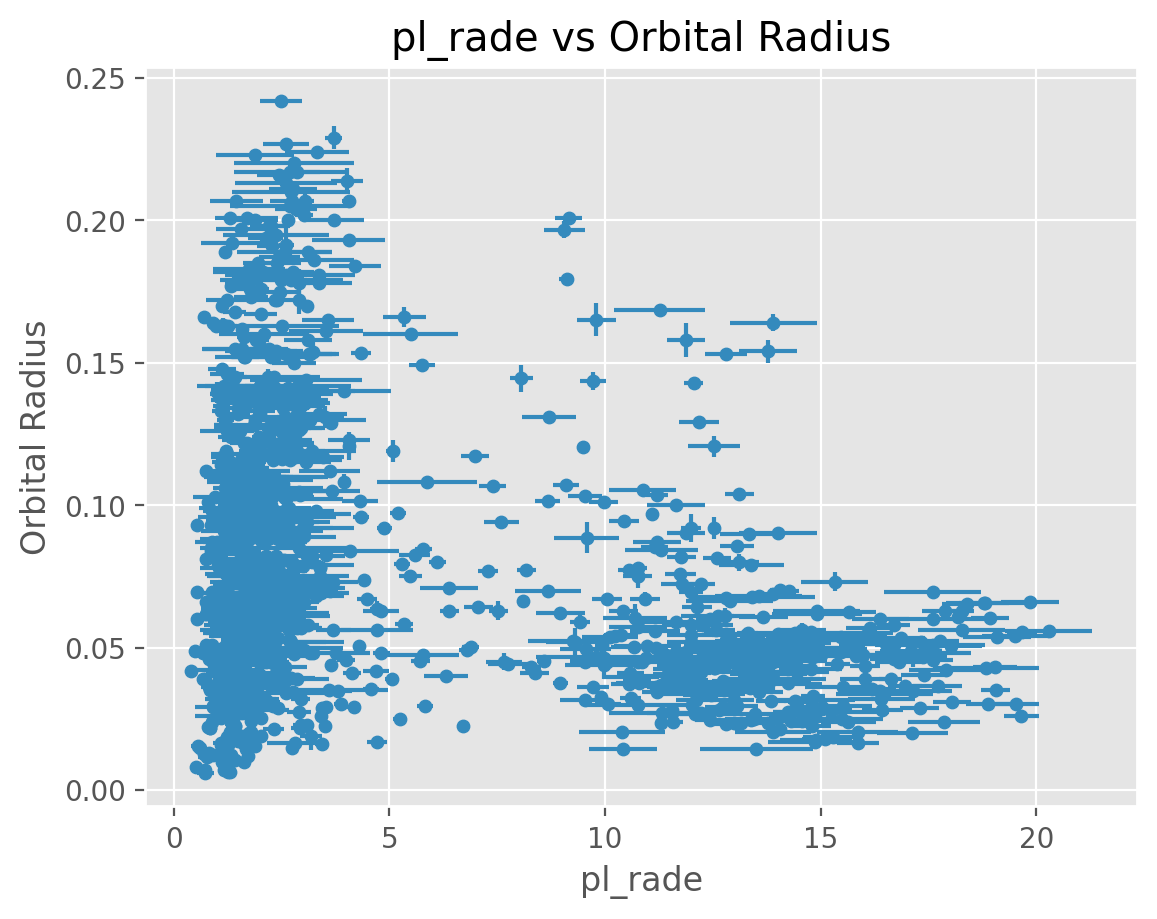

In [42]:
if sec2.kwargs['selection'] == 'teff':
    indv = 'st_teff'
elif sec2.kwargs['selection'] == 'radst':
    indv = 'st_rad'
elif sec2.kwargs['selection'] == 'massst':
    indv = 'st_mass'
elif sec2.kwargs['selection'] == 'met':
    indv = 'st_met'
elif sec2.kwargs['selection'] == 'agest':
    indv = 'st_age'
elif sec2.kwargs['selection'] == 'rad':
    indv = 'pl_rade'
elif sec2.kwargs['selection'] == 'mass':
    indv = 'pl_masse'
else:
    indv = 'pl_' + sec2.kwargs['selection']

data[sec2.kwargs['selection']].plot(kind = 'scatter', 
         x = indv, 
         y = 'pl_orbsmax', 
         xerr=data[sec2.kwargs['selection']][indv + 'err1'],
         yerr=data[sec2.kwargs['selection']]['pl_orbsmaxerr1'], 
         ylabel= 'Orbital Radius',
         xlabel= indv,
         title= indv + ' vs Orbital Radius')

plt.show()

In [43]:
sec3 = interactive(function_mcq, 
                 selection=['massDens',
                            'insolEqt',
                            'massstMet']); 
display(sec3)

interactive(children=(Dropdown(description='selection', options=('massDens', 'insolEqt', 'massstMet'), value='…

orbit radius vs pl_masse with pl_dens as size


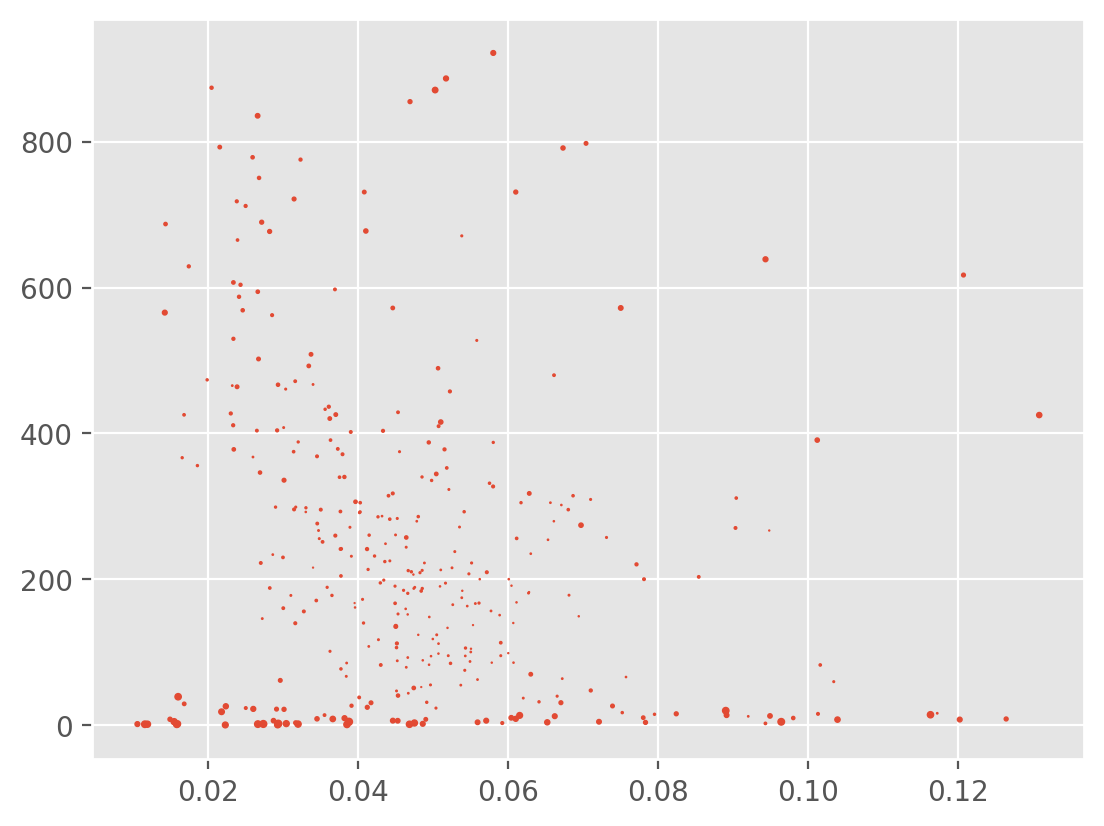

In [48]:
if sec3.kwargs['selection'] == 'massDens':
    indv1 = 'pl_masse'
    indv2 = 'pl_dens'
elif sec3.kwargs['selection'] == 'insolEqt':
    indv1 = 'pl_insol'
    indv2 = 'pl_eqt'
elif sec3.kwargs['selection'] == 'massstMet':
    indv1 = 'st_mass'
    indv2 = 'st_met'

plt.scatter( 
         x = data[sec3.kwargs['selection']]['pl_orbsmax'], 
         y = data[sec3.kwargs['selection']][indv1],
         s = data[sec3.kwargs['selection']][indv2],
            
)
print( f'orbit radius vs {indv1} with {indv2} as size')
plt.show()

### Full Model  

In [51]:
# short and sweet
dataString = {}

for key, value in data.items():
    if key == 'teff':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_teff'
    elif key == 'radst':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_rad'
    elif key == 'massst':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_mass'
    elif key == 'met':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_met'
    elif key == 'agest':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_age'
    elif key == 'rad':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_rade'
    elif key == 'mass':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_masse'
    elif key == 'massDens':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_masse' + ' + pl_dens'
    elif key == 'insolEqt':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_insol ' + '+ pl_eqt'
    elif key == 'massstMet':
        dataString[key] = 'pl_orbsmax ~ ' + 'st_mass ' + '+ st_met'
    elif key == 'supe':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_masse ' +  '+ pl_rade ' + '+ pl_insol ' + '+ pl_eqt ' + '+ st_mass ' + '+ st_met '
    elif key == 'supe1':
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_dens ' + '+ pl_masse ' + '+ pl_rade ' + '+ pl_orbeccen ' + '+ st_mass ' + '+ st_met'
    else:
        dataString[key] = 'pl_orbsmax ~ ' + 'pl_' + key
    print(dataString[key])

pl_orbsmax ~ pl_rade
pl_orbsmax ~ pl_masse
pl_orbsmax ~ pl_dens
pl_orbsmax ~ pl_orbeccen
pl_orbsmax ~ pl_insol
pl_orbsmax ~ pl_eqt
pl_orbsmax ~ st_teff
pl_orbsmax ~ st_rad
pl_orbsmax ~ st_mass
pl_orbsmax ~ st_met
pl_orbsmax ~ st_age
pl_orbsmax ~ pl_masse + pl_dens
pl_orbsmax ~ pl_insol + pl_eqt
pl_orbsmax ~ st_mass + st_met


In [52]:
models = {}

for key in data.keys():
    models[key] = sm.formula.ols(formula=dataString[key], data=data[key])
    models[key] = models[key].fit()
    print(models[key].summary())

                            OLS Regression Results                            
Dep. Variable:             pl_orbsmax   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     97.10
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           4.21e-22
Time:                        18:16:57   Log-Likelihood:                 2083.1
No. Observations:                1235   AIC:                            -4162.
Df Residuals:                    1233   BIC:                            -4152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0871      0.002     48.523      0.0

In [53]:
pred = {}
for key in data.keys():
    pred[key] = pd.DataFrame({'actual': data[key]['pl_orbsmax'], 
                               'predicted': models[key].fittedvalues, 
                               'residual': models[key].resid})

### Full Model Diagnostic Checks

In [54]:
sec4 = interactive(function_mcq, 
                 selection=['rad', 
                            'mass',
                            'dens',
                            'orbeccen',
                            'insol',
                            'eqt',
                            'teff',
                            'radst',
                            'massst',
                            'met',
                            'agest',
                            'massDens',
                            'insolEqt',
                            'massstMet',
                            'supe',
                            'supe1']); 
display(sec4)

interactive(children=(Dropdown(description='selection', options=('rad', 'mass', 'dens', 'orbeccen', 'insol', '…

### Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [49]:
sec5 = interactive(function_mcq, 
                 selection=['supe',
                            'supe1']); 
display(sec5)

interactive(children=(Dropdown(description='selection', options=('supe', 'supe1'), value='supe'), Output()), _…

In [50]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(dataString[sec5.kwargs['selection']])

# initialize feature-selected fit to full model
linreg_fit = models[sec5.kwargs['selection']]

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data[sec5.kwargs['selection']]).fit()

###
## this is the clean fit after backwards elimination
models[sec5] = smf.ols(formula = patsy_description, data = data[sec5.kwargs['selection']]).fit()
###

#########
print("\n***")
print(models[sec5.kwargs['selection']].summary())
print("***")
print(f"Regression number of terms: {len(models[sec5.kwargs['selection']].model.exog_names)}")
print(f"Regression F-distribution p-value: {models[sec5.kwargs['selection']].f_pvalue:.4f}")
print(f"Regression R-squared: {models[sec5.kwargs['selection']].rsquared:.4f}")
print(f"Regression Adjusted R-squared: {models[sec5.kwargs['selection']].rsquared_adj:.4f}")

NameError: name 'dataString' is not defined

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations <a id='cl'></a>

A thorough preparation stage was required due to the large amount of missing values. The topic we chose has a lot of unknown or innacurate variables by its nature; this can have not only the effect of decreasing our sample size for statistical modelling, but also skewing our results towards certain data points due to selection bias of the data that is available. For example: a planetary system with a brighter and larger star is likely to have more complete observation data, causing such systems to be overrepresented in our models. 

Because of the missing values we split up our database into tables categorised by planetary attributes so for example we could use all the planets with available radii predict orbit distance. This structure however, was insufficient when it came to performing a backwards feature selection. We opted for culling data points with relevant missing variable which significantly reduces the sample size and therefor accuracy of our model. 

## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.

### References
- 	“List of all known planets and hosts” [database] (n.d). Retrieved 2nd of October 2022 from https://exoplanetarchive.ipac.caltech.edu/index.html